In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 

In [35]:
data = pd.read_csv("dataset/Covid19VAERSJanJune2021.csv")
data = data[data.VAX_MANU!='UNKNOWN MANUFACTURER']
data = data[(data.FORM_VERS==2) & (data['VAX_DOSE_SERIES'].isin(['1','2']))]

In [36]:
data.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [37]:
data.head()

VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia             23.1   
1    916601                  Anxiety             23.1   
2    916602         Chest discomfort             23.1   
4    916604  Injection site erythema             23.1   
5    916606      Pharyngeal swelling             23.1   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis             23.1                      NaN   
1                 Dyspnoea             23.1                      NaN   
2                Dysphagia             23.1        Pain in extremity   
4  Injection site pruritus             23.1  Injection site swelling   
5                      NaN              NaN                      NaN   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  ...  \
0              NaN                    NaN              NaN      NaN  ...   
1              NaN                    NaN              NaN      NaN  ...   
2             23.1      Visual impairment             23.1      NaN  ...   
4             23.1  Injection site warmth             23.1      NaN  ...   
5              NaN                    NaN              NaN      NaN  ...   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
4                                                 Na   
5                                                NaN   

                                             HISTORY PRIOR_VAX SPLTTYPE  \
0                                               None       NaN      NaN   
1  Patient residing at nursing facility. See pati...       NaN      NaN   
2                                               None       NaN      NaN   
4                                                NaN       NaN      NaN   
5                                                NaN       NaN      NaN   

  FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0         2  01/01/2021          NaN         Y         NaN   
1         2  01/01/2021          NaN         Y         NaN   
2         2  01/01/2021          NaN       NaN           Y   
4         2  01/01/2021          NaN       NaN         NaN   
5         2  01/01/2021          NaN       NaN         NaN   

                       ALLERGIES  
0              Pcn and bee venom  
1                        "Dairy"  
2                      Shellfish  
4                             Na  
5  iodine (shellfish) has epipen  

[5 rows x 52 columns]

In [38]:
data.describe()

VAERS_ID  SYMPTOMVERSION1  SYMPTOMVERSION2  SYMPTOMVERSION3  \
count  6.180660e+05    618066.000000    492205.000000    384994.000000   
mean   1.265412e+06        23.920739        23.921255        23.920621   
std    2.153984e+05         0.255055         0.254302         0.255226   
min    9.166000e+05        23.100000        23.100000        23.100000   
25%    1.082086e+06        24.000000        24.000000        24.000000   
50%    1.247812e+06        24.000000        24.000000        24.000000   
75%    1.442430e+06        24.000000        24.000000        24.000000   
max    1.669883e+06        24.000000        24.000000        24.000000   

       SYMPTOMVERSION4  SYMPTOMVERSION5        AGE_YRS       CAGE_YR  \
count    293790.000000    219265.000000  578711.000000  529630.00000   
mean         23.921855        23.919898      49.651273      49.28734   
std           0.253424         0.256272      18.468816      18.56939   
min          23.100000        23.100000       0.080000       0.00000   
25%          24.000000        24.000000      35.000000      35.00000   
50%          24.000000        24.000000      50.000000      49.00000   
75%          24.000000        24.000000      64.000000      64.00000   
max          24.000000        24.000000     119.000000     120.00000   

          CAGE_MO      HOSPDAYS        NUMDAYS  FORM_VERS  
count  895.000000  41765.000000  574046.000000   618066.0  
mean     0.049497     29.306070      22.539249        2.0  
std      0.146843   1547.128631     581.051753        0.0  
min      0.000000      1.000000       0.000000        2.0  
25%      0.000000      2.000000       0.000000        2.0  
50%      0.000000      3.000000       1.000000        2.0  
75%      0.000000      6.000000       5.000000        2.0  
max      1.000000  99999.000000   44224.000000        2.0

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618066 entries, 0 to 733317
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         618066 non-null  int64  
 1   SYMPTOM1         618066 non-null  object 
 2   SYMPTOMVERSION1  618066 non-null  float64
 3   SYMPTOM2         492205 non-null  object 
 4   SYMPTOMVERSION2  492205 non-null  float64
 5   SYMPTOM3         384994 non-null  object 
 6   SYMPTOMVERSION3  384994 non-null  float64
 7   SYMPTOM4         293790 non-null  object 
 8   SYMPTOMVERSION4  293790 non-null  float64
 9   SYMPTOM5         219265 non-null  object 
 10  SYMPTOMVERSION5  219265 non-null  float64
 11  VAX_TYPE         618066 non-null  object 
 12  VAX_MANU         618066 non-null  object 
 13  VAX_LOT          460674 non-null  object 
 14  VAX_DOSE_SERIES  618066 non-null  object 
 15  VAX_ROUTE        536524 non-null  object 
 16  VAX_SITE         521166 non-null  obje

In [40]:
float_features=data.select_dtypes(include='float64').columns
int_features=data.select_dtypes(include='int64').columns
object_features=data.select_dtypes(include='object').columns

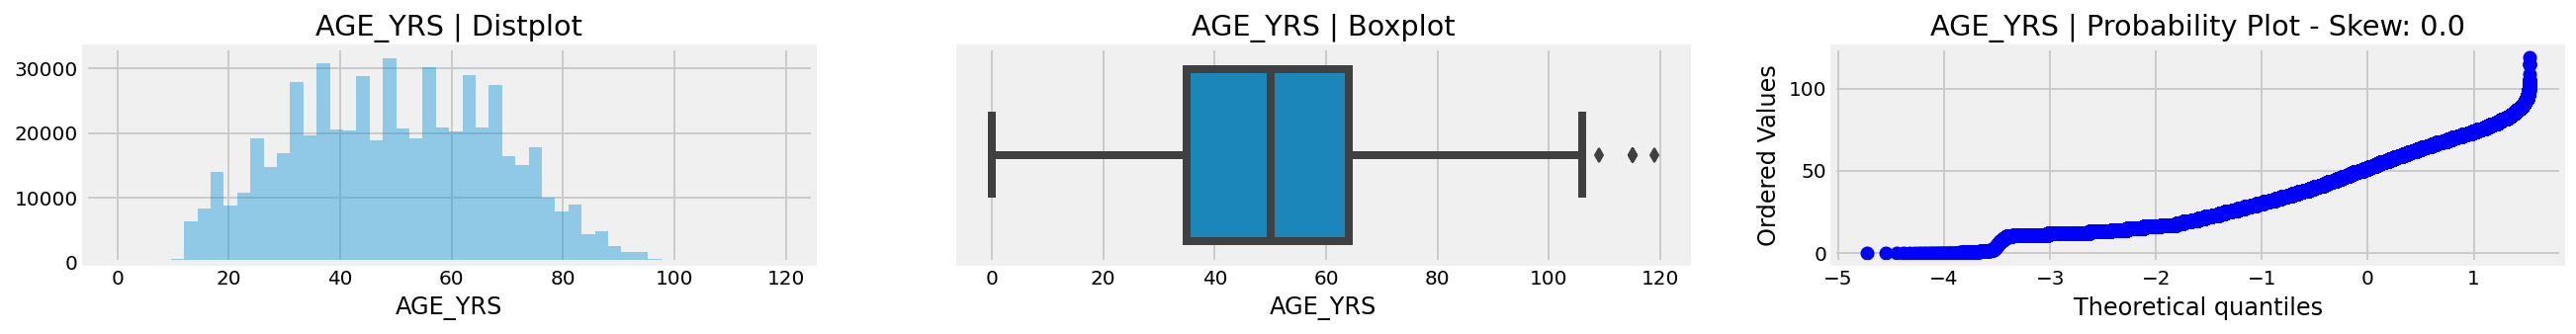

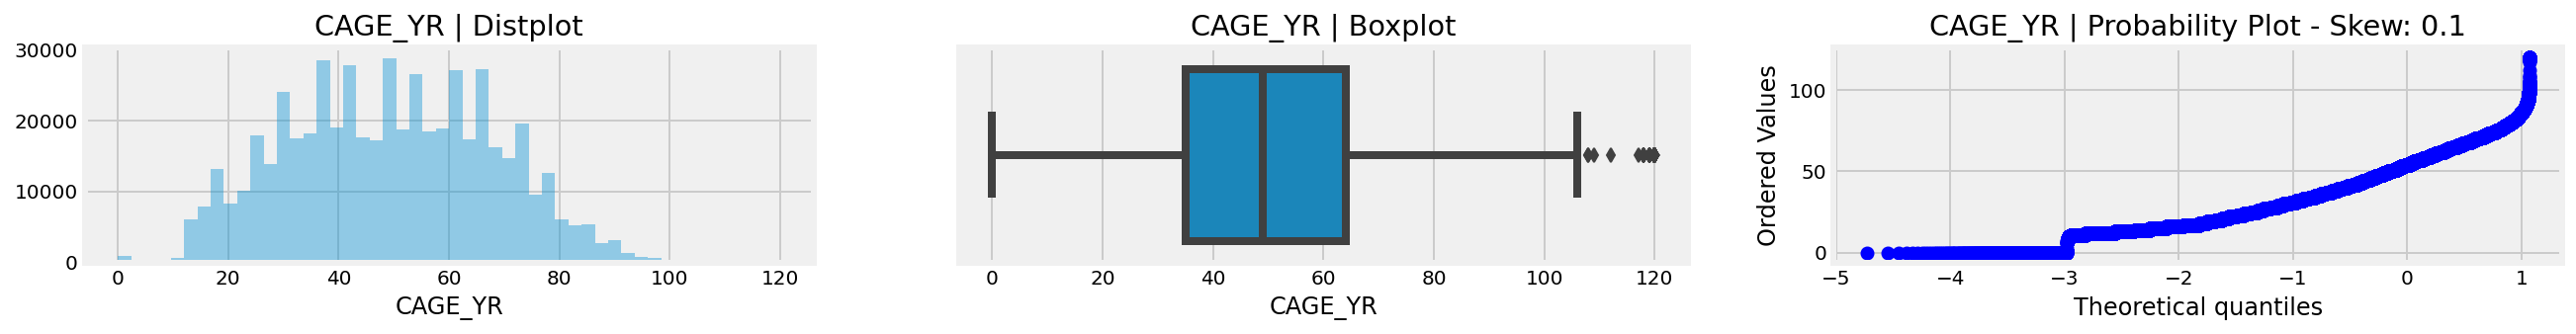

In [41]:
from scipy.stats import probplot,skew

def plot_basic_stat(data, feats):
    for feat in feats:
        fig, axes = plt.subplots(1, 3, figsize=(20,2))
        sns.distplot(data[feat],kde=False, ax=axes[0])
        sns.boxplot(data[feat], ax=axes[1])
        probplot(data[feat], plot=axes[2])
        skew_val=round(data[feat].skew(), 1)
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(feat + " | Distplot")
        axes[1].set_title(feat + " | Boxplot")
        axes[2].set_title(feat + " | Probability Plot - Skew: "+str(skew_val))
        plt.show()
plot_basic_stat(data,['AGE_YRS','CAGE_YR'])

<AxesSubplot:xlabel='VAX_MANU', ylabel='count'>

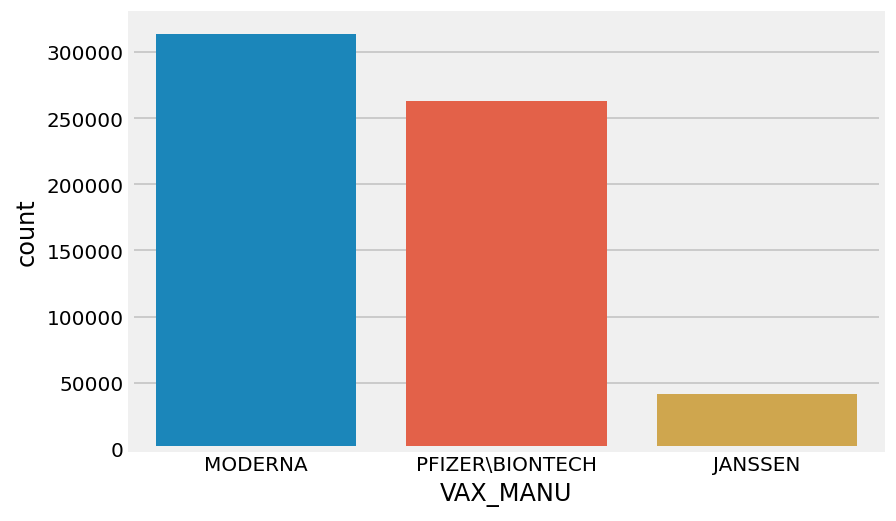

In [42]:
sns.countplot(data=data, x="VAX_MANU")

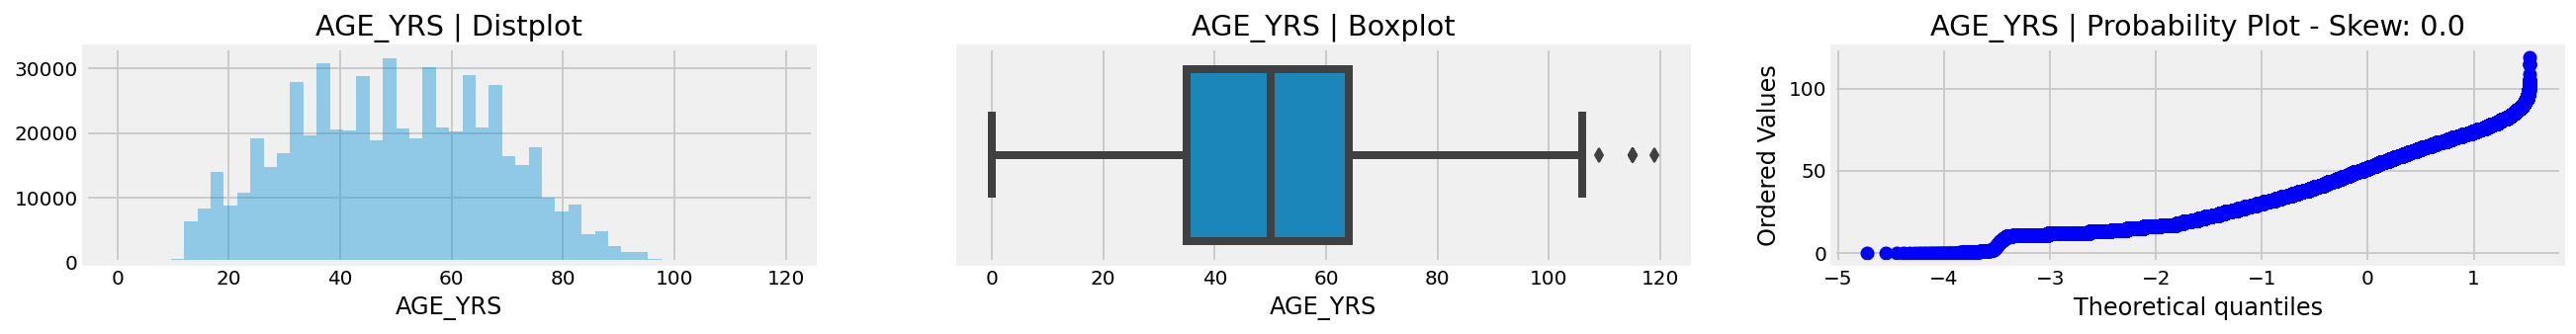

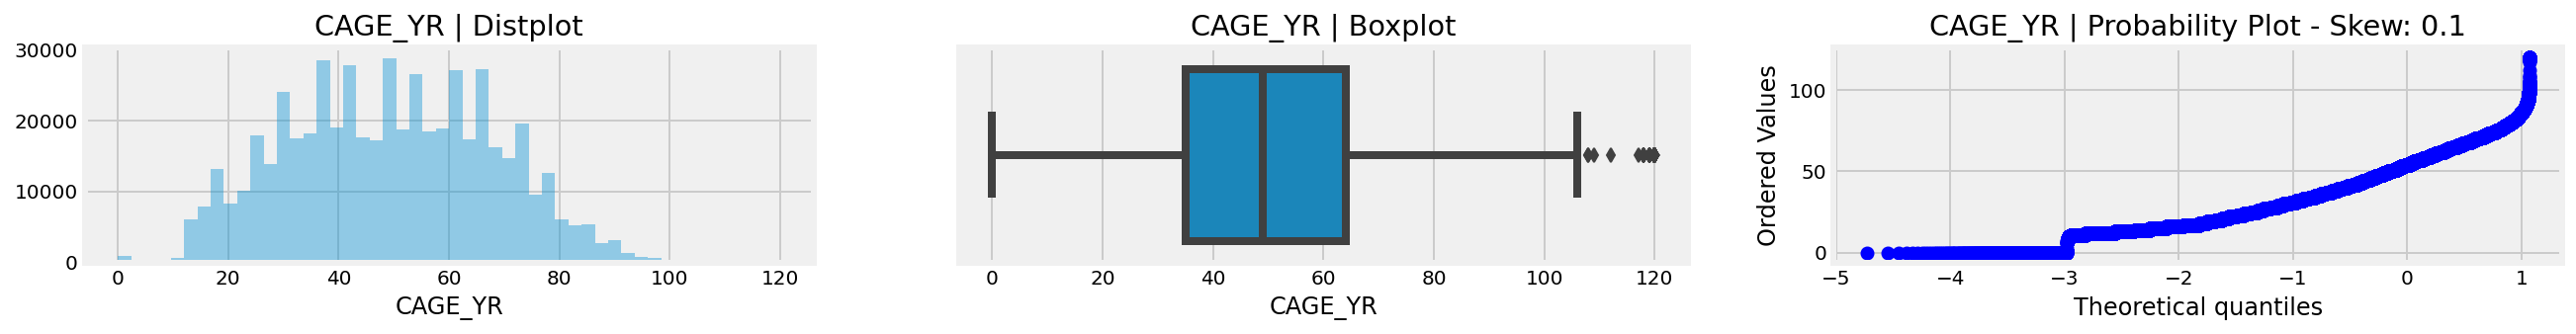

In [43]:
from scipy.stats import probplot,skew

def plot_basic_stat(data, feats):
    for feat in feats:
        fig, axes = plt.subplots(1, 3, figsize=(20,2))
        sns.distplot(data[feat],kde=False, ax=axes[0])
        sns.boxplot(data[feat], ax=axes[1])
        probplot(data[feat], plot=axes[2])
        skew_val=round(data[feat].skew(), 1)
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(feat + " | Distplot")
        axes[1].set_title(feat + " | Boxplot")
        axes[2].set_title(feat + " | Probability Plot - Skew: "+str(skew_val))
        plt.show()
plot_basic_stat(data,['AGE_YRS','CAGE_YR'])

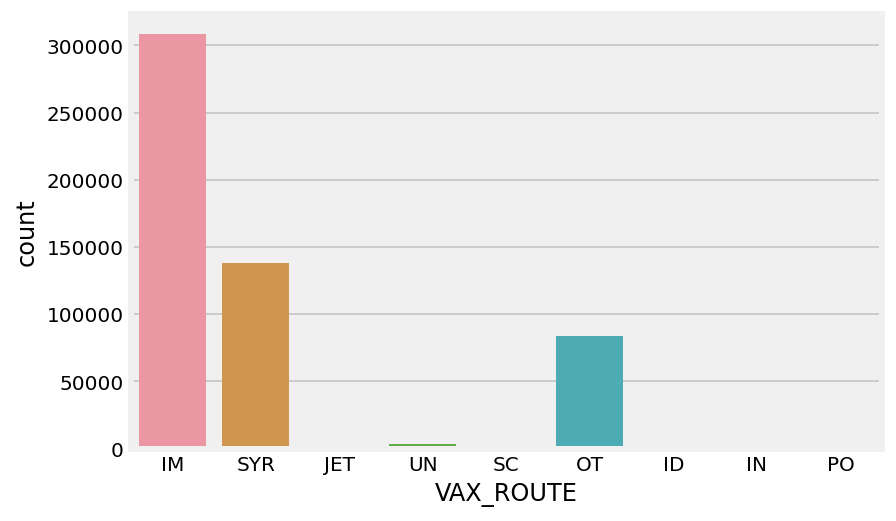

In [44]:
sns.countplot(data=data, x= "VAX_ROUTE")
plt.show()

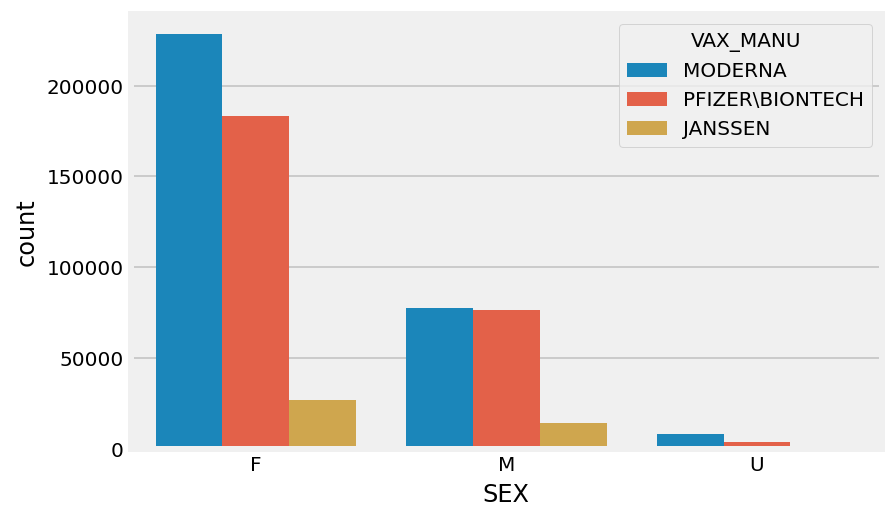

In [45]:
sns.countplot(x="SEX", hue="VAX_MANU", data=data)
plt.show()

In [46]:
data[["SEX","AGE_YRS"]].groupby(["SEX"], as_index = False).mean().sort_values(by = "AGE_YRS",ascending = False)

SEX    AGE_YRS
2   U  49.921292
1   M  49.816015
0   F  49.586539

In [47]:
from collections import Counter

def iqr_outliers(df,feats):
    outlier_indices  = []
    
    for feat in feats:
        Q1 = df[feat].quantile(0.25)
        Q3 = df[feat].quantile(0.75)
        IQR = Q3 - Q1
        IQR_val = 1.5 * IQR
        outlier_list_col = df[((df[feat] < (Q1 - IQR_val)) | (df[feat] > (Q3 + IQR_val)))].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    return outliers
out_cols = ['AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'HOSPDAYS', 'NUMDAYS']
iqr_outliers(data,out_cols)

data.loc[iqr_outliers(data,out_cols)]

Empty DataFrame
Columns: [VAERS_ID, SYMPTOM1, SYMPTOMVERSION1, SYMPTOM2, SYMPTOMVERSION2, SYMPTOM3, SYMPTOMVERSION3, SYMPTOM4, SYMPTOMVERSION4, SYMPTOM5, SYMPTOMVERSION5, VAX_TYPE, VAX_MANU, VAX_LOT, VAX_DOSE_SERIES, VAX_ROUTE, VAX_SITE, VAX_NAME, RECVDATE, STATE, AGE_YRS, CAGE_YR, CAGE_MO, SEX, RPT_DATE, SYMPTOM_TEXT, DIED, DATEDIED, L_THREAT, ER_VISIT, HOSPITAL, HOSPDAYS, X_STAY, DISABLE, RECOVD, VAX_DATE, ONSET_DATE, NUMDAYS, LAB_DATA, V_ADMINBY, V_FUNDBY, OTHER_MEDS, CUR_ILL, HISTORY, PRIOR_VAX, SPLTTYPE, FORM_VERS, TODAYS_DATE, BIRTH_DEFECT, OFC_VISIT, ER_ED_VISIT, ALLERGIES]
Index: []

[0 rows x 52 columns]

In [48]:
data = data.drop(iqr_outliers(data,out_cols),axis = 0).reset_index(drop=True)

In [49]:
data.columns[data.isnull().any()]

Index(['SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_LOT',
       'VAX_ROUTE', 'VAX_SITE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_FUNDBY', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'TODAYS_DATE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES'],
      dtype='object')

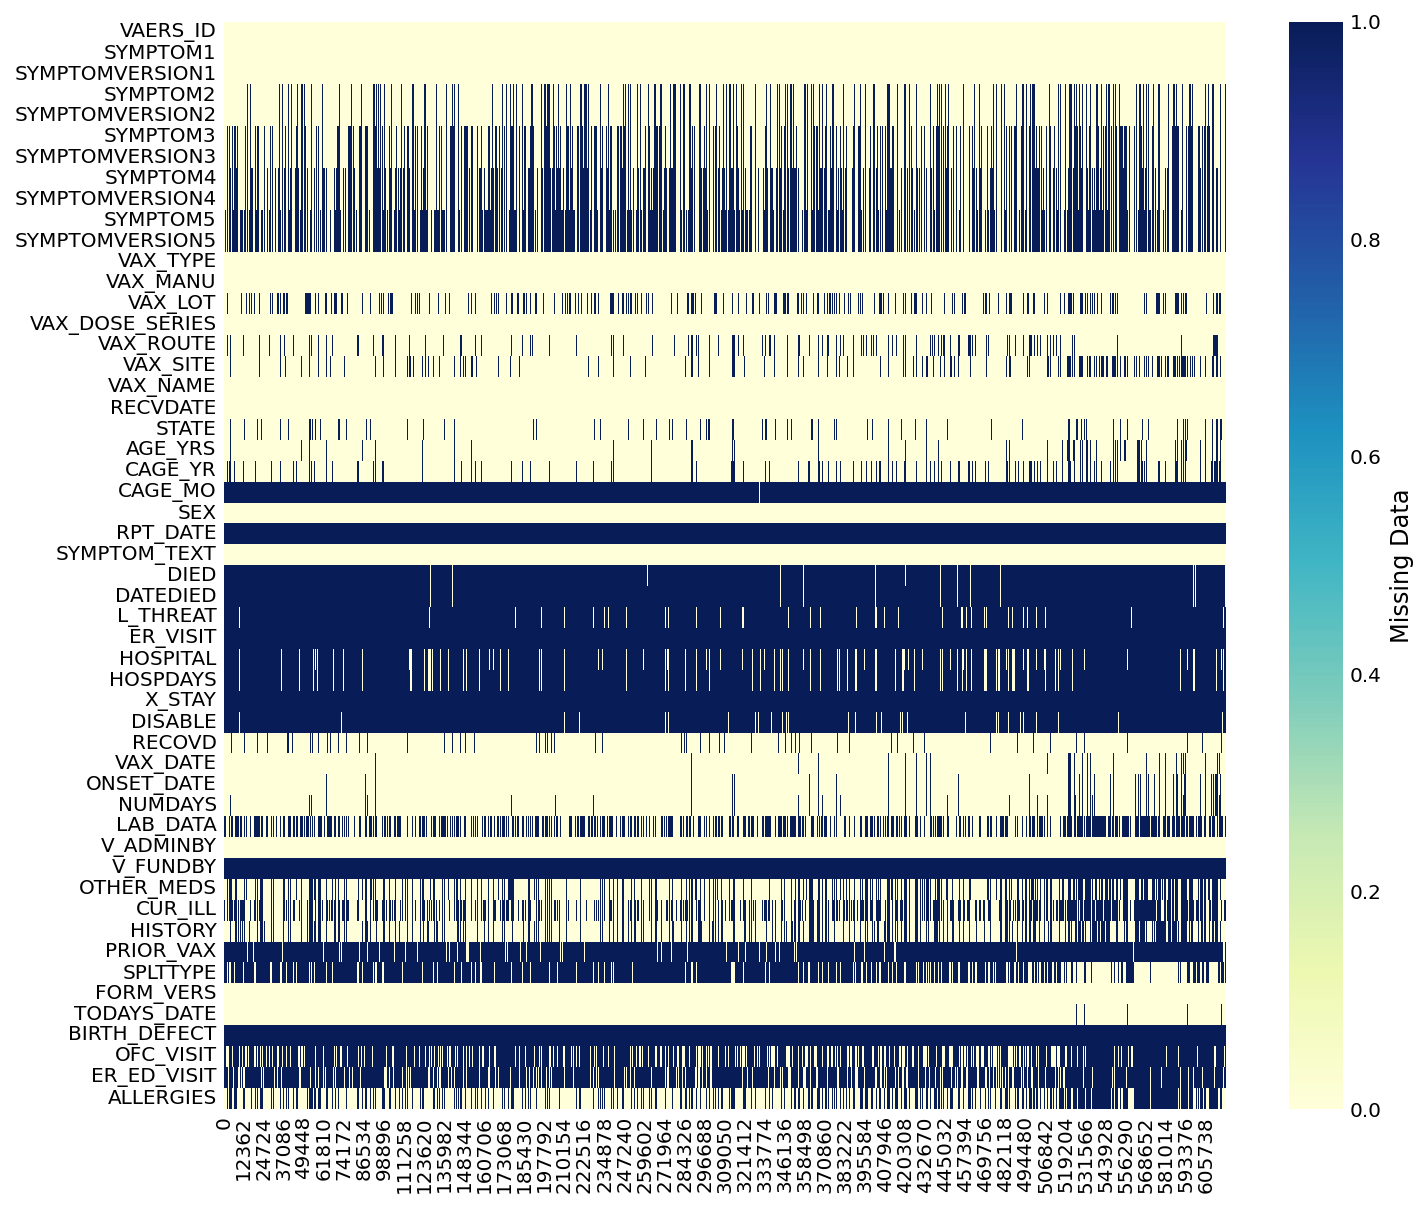

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [51]:
data['AGE_YRS'].isnull().sum()

39355

In [52]:
gender_age=data[["SEX","AGE_YRS"]].groupby(["SEX"], as_index = False).median().sort_values(by = "AGE_YRS",ascending = False)
gender_age

SEX  AGE_YRS
1   M     51.0
2   U     51.0
0   F     49.0

In [53]:
age_dict=gender_age.set_index('SEX')['AGE_YRS'].to_dict()
data['AGE_YRS']=data.AGE_YRS.fillna(data.SEX.map(age_dict))
data['AGE_YRS'].isnull().sum()

0

In [54]:
data.DIED.isnull().sum()

608646

In [55]:
data['DIED']=data.DIED.fillna('N')
data.DIED.value_counts()

N    608646
Y      9420
Name: DIED, dtype: int64

In [56]:
data['HOSPITAL']=data.HOSPITAL.fillna('N')

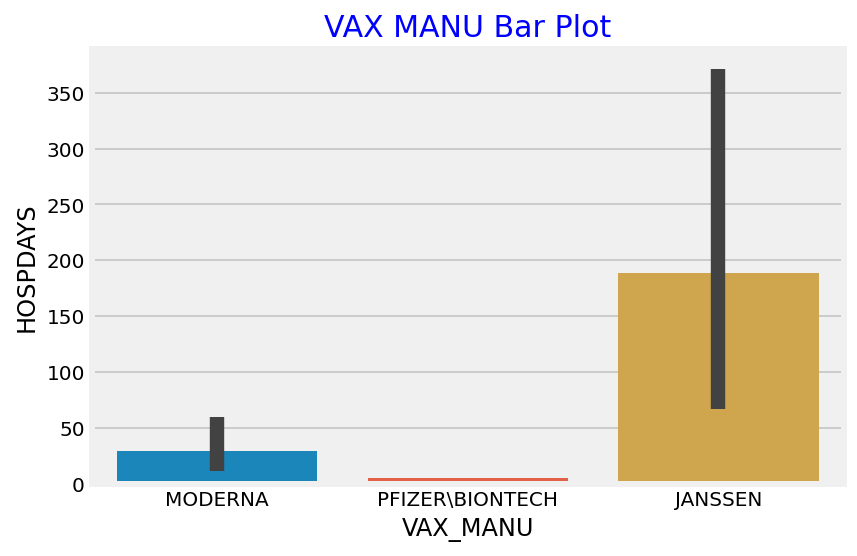

In [57]:
plt.title("VAX MANU Bar Plot",color = 'blue',fontsize=15)
sns.barplot(x="VAX_MANU", y="HOSPDAYS", data=data)
plt.show()

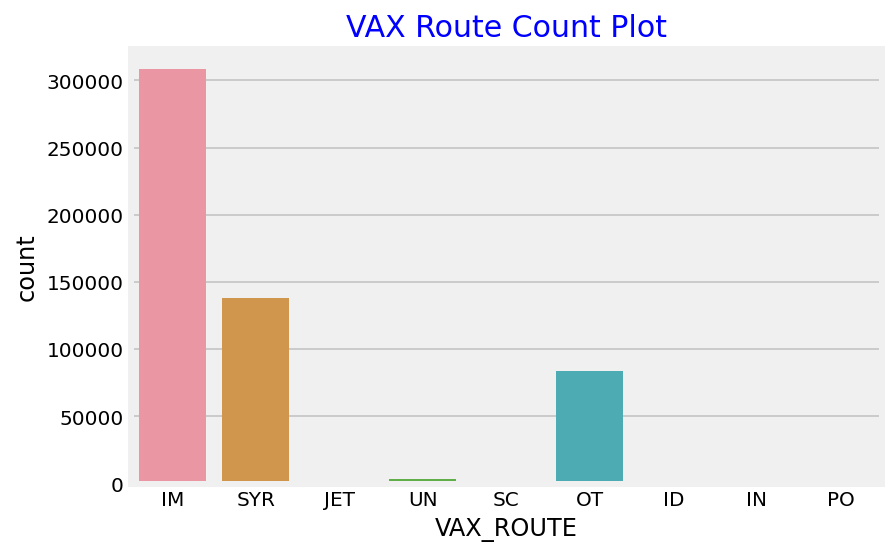

In [58]:
plt.title("VAX Route Count Plot",color = 'blue',fontsize=15)
sns.countplot(x="VAX_ROUTE", data=data)
plt.show()

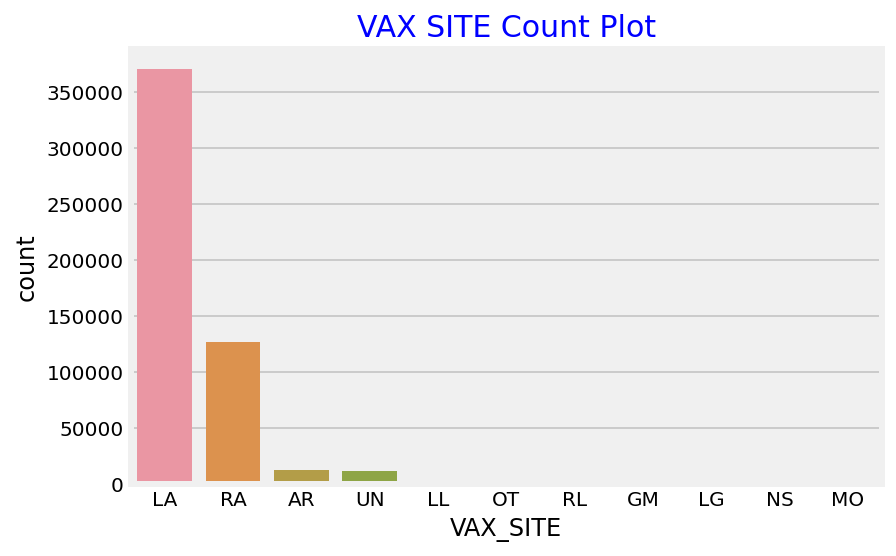

In [59]:
plt.title("VAX SITE Count Plot",color = 'blue',fontsize=15)
sns.countplot(x="VAX_SITE", data=data)
plt.show()

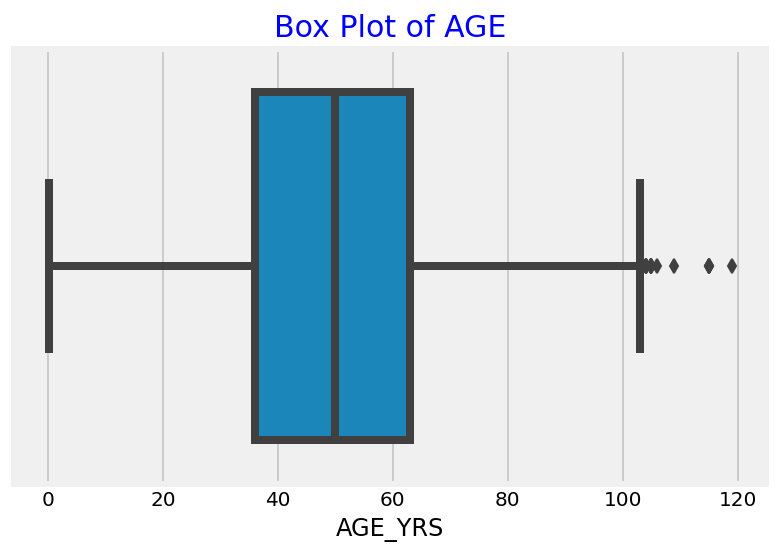

In [63]:
plt.title("Box Plot of AGE",color = 'blue',fontsize=15)
sns.boxplot(data.AGE_YRS)
plt.show()

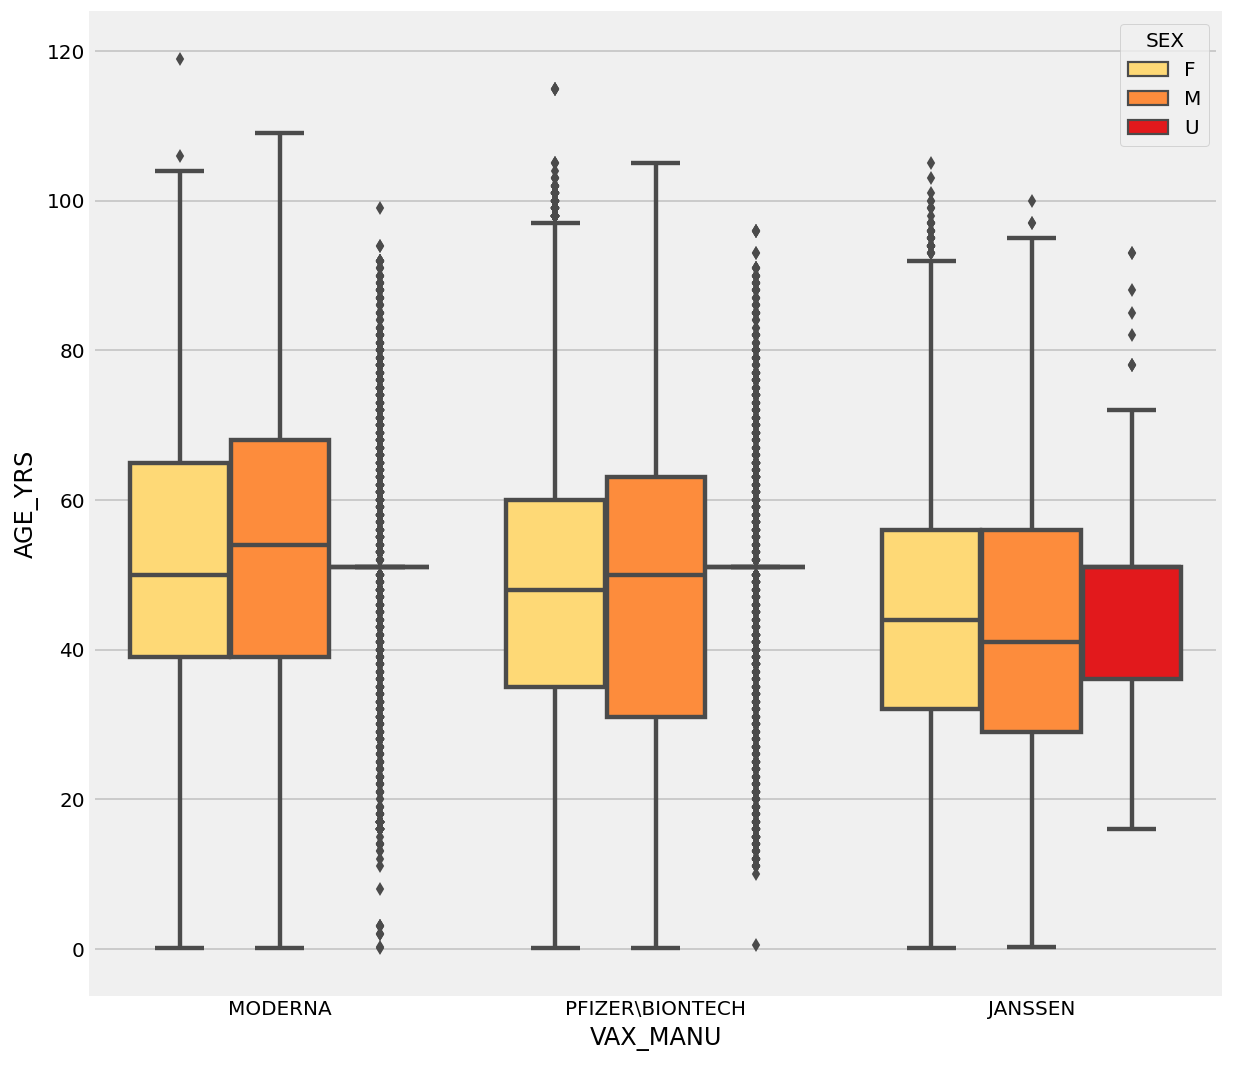

In [64]:
plt.figure(figsize = (9,9))
sns.boxplot(x="VAX_MANU", y="AGE_YRS", hue="SEX", linewidth=2.2, fliersize= 3.2 ,data=data, saturation=1, palette="YlOrRd")
plt.show()

<AxesSubplot:title={'center':'Correlation Heatmap'}>

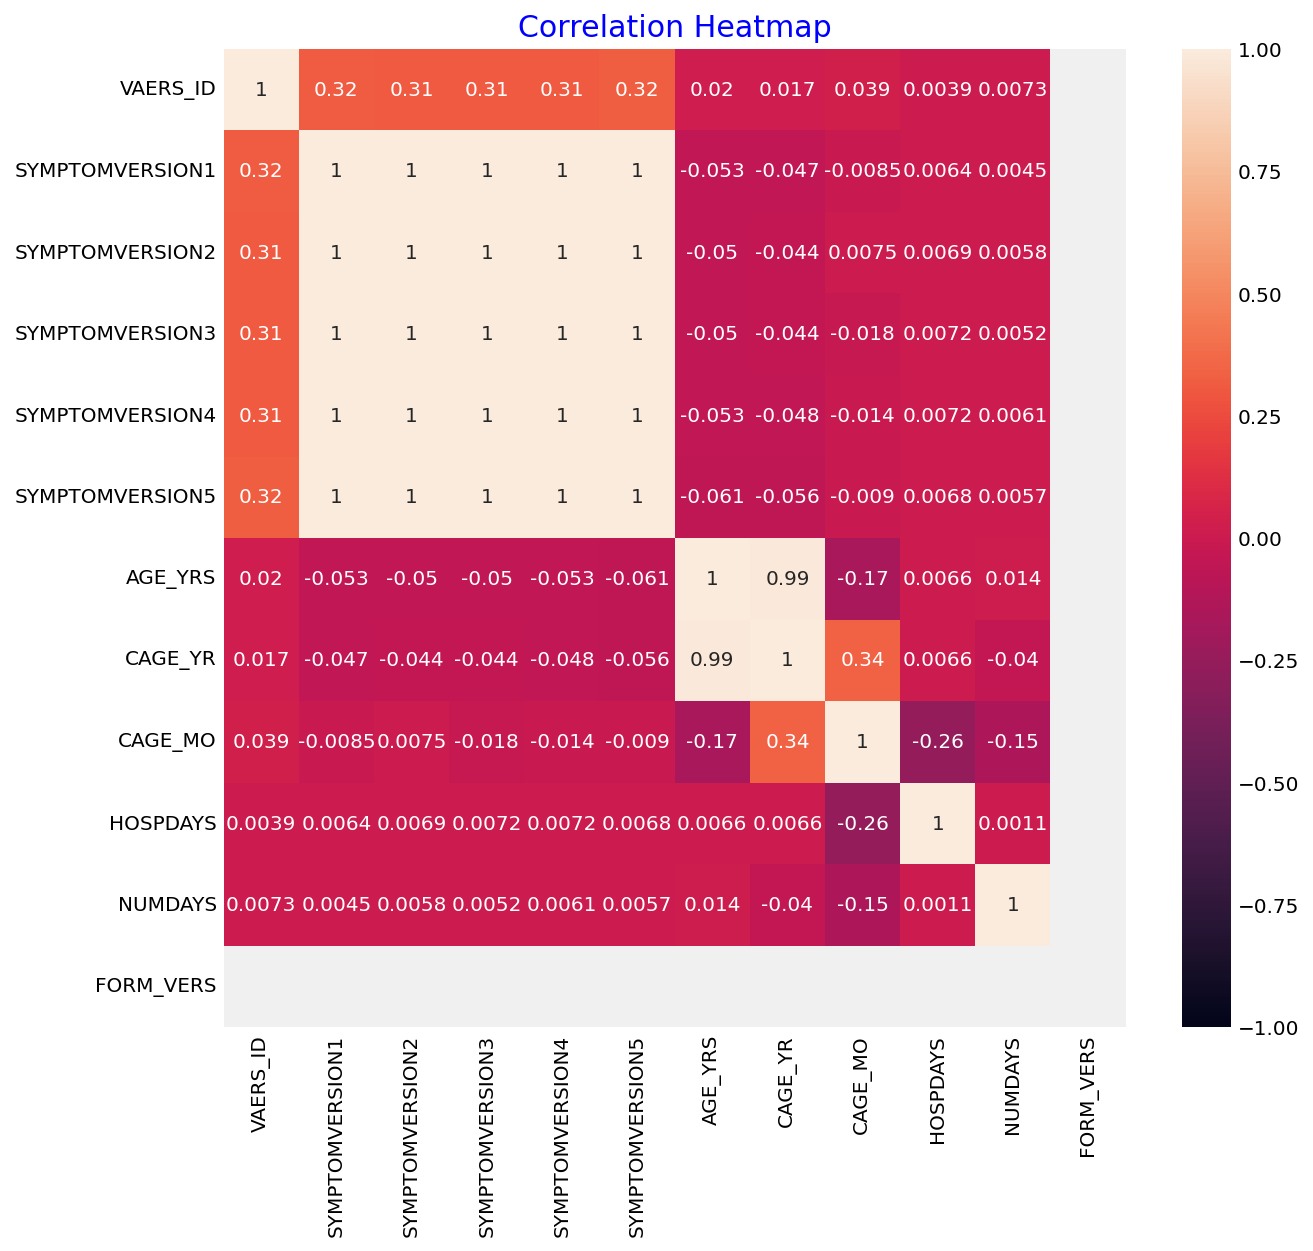

In [65]:
plt.figure(figsize = (9,9))
plt.title("Correlation Heatmap",color = 'blue',fontsize=15)
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

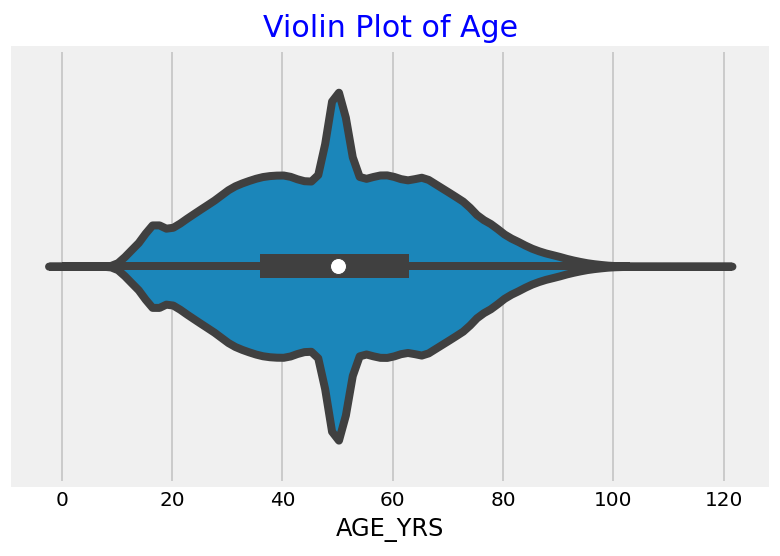

In [66]:
plt.title("Violin Plot of Age",color = 'blue',fontsize=15)
ax = sns.violinplot(x=data["AGE_YRS"])

<AxesSubplot:xlabel='SEX', ylabel='AGE_YRS'>

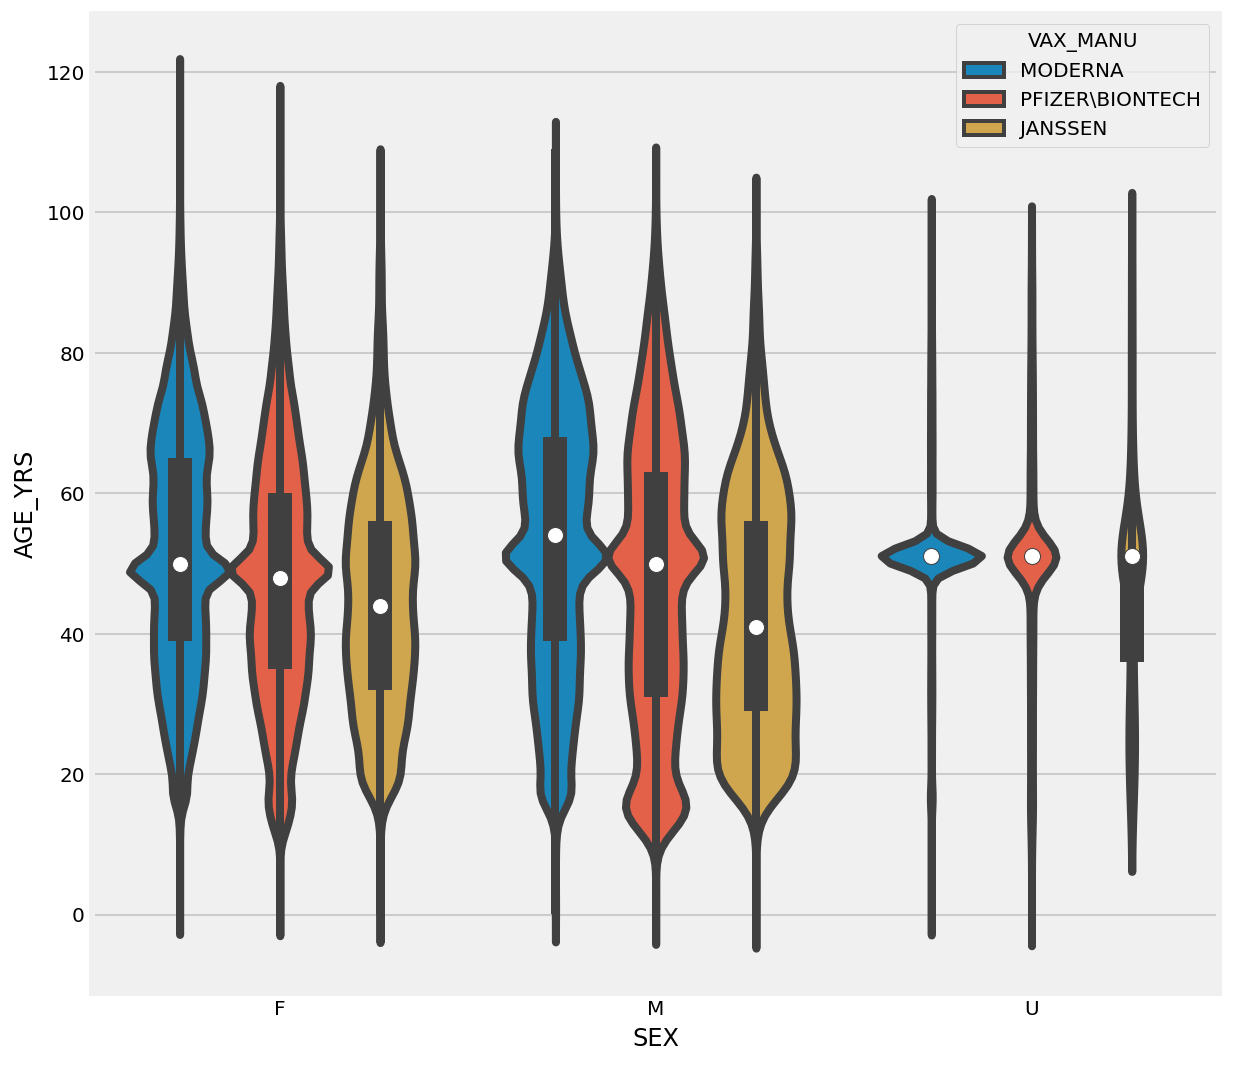

In [67]:
plt.figure(figsize = (9,9))
sns.violinplot(x="SEX", y="AGE_YRS", data=data, hue="VAX_MANU",orient='v')

<AxesSubplot:title={'center':'Point Plot Example'}, xlabel='SEX', ylabel='AGE_YRS'>

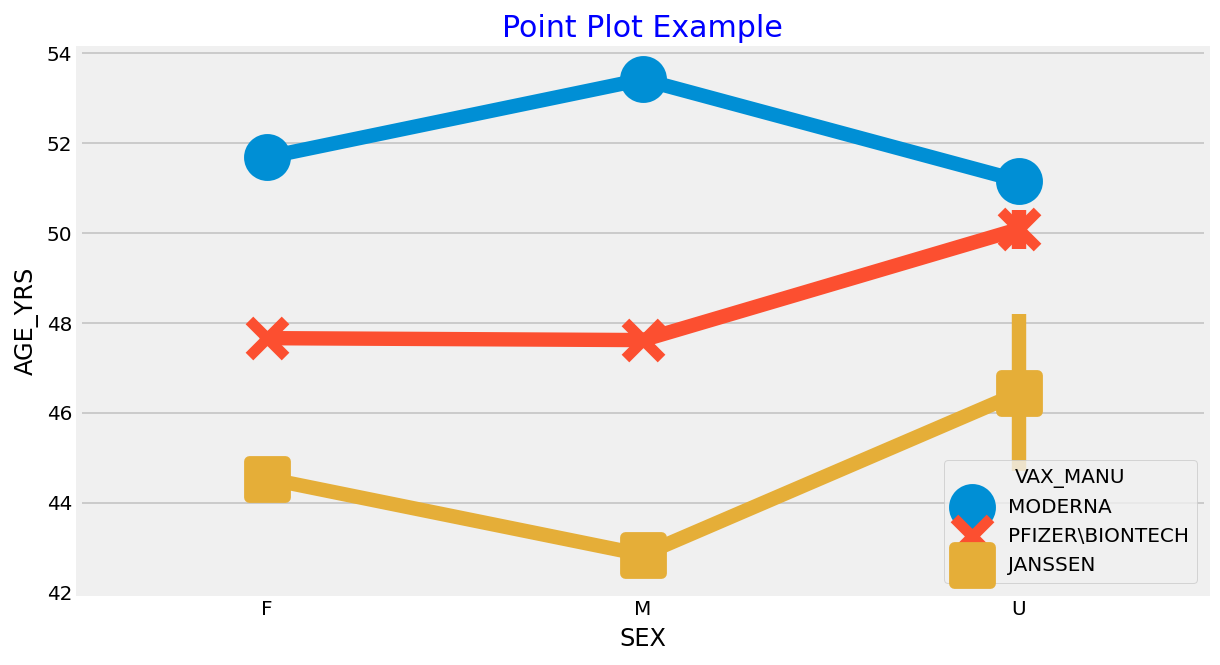

In [68]:
plt.figure(figsize = (9,5))
plt.title("Point Plot Example",color = 'blue',fontsize=15)
sns.pointplot(x="SEX", y="AGE_YRS", hue="VAX_MANU", data=data, markers=["o","x","s"])

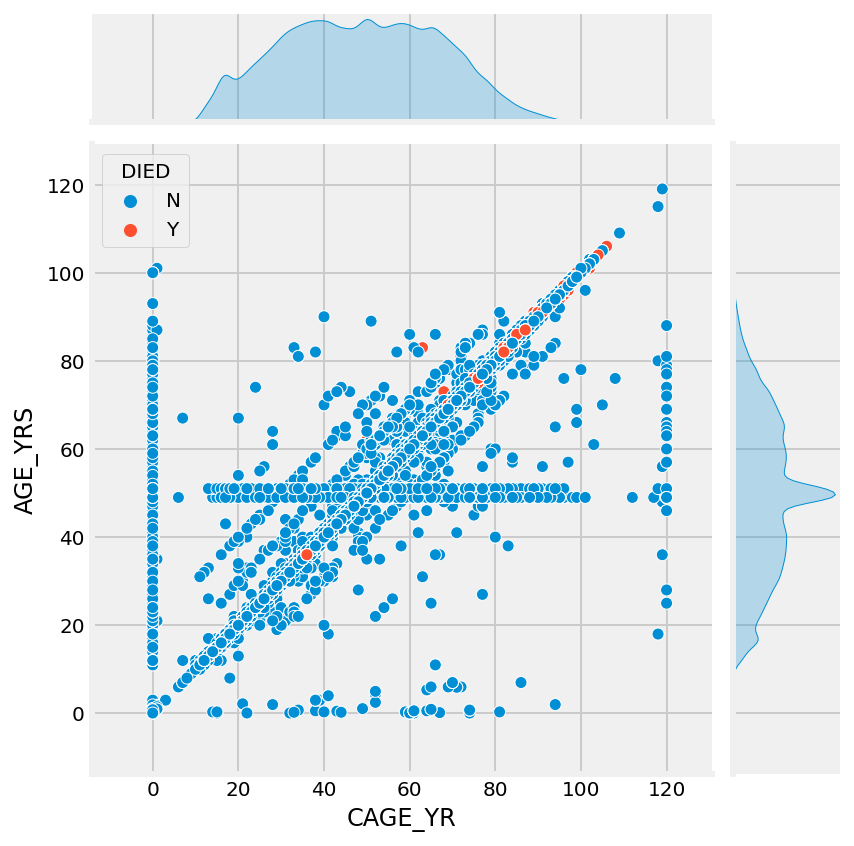

In [70]:
sns.jointplot(data=data, x="CAGE_YR", y="AGE_YRS", hue="DIED")

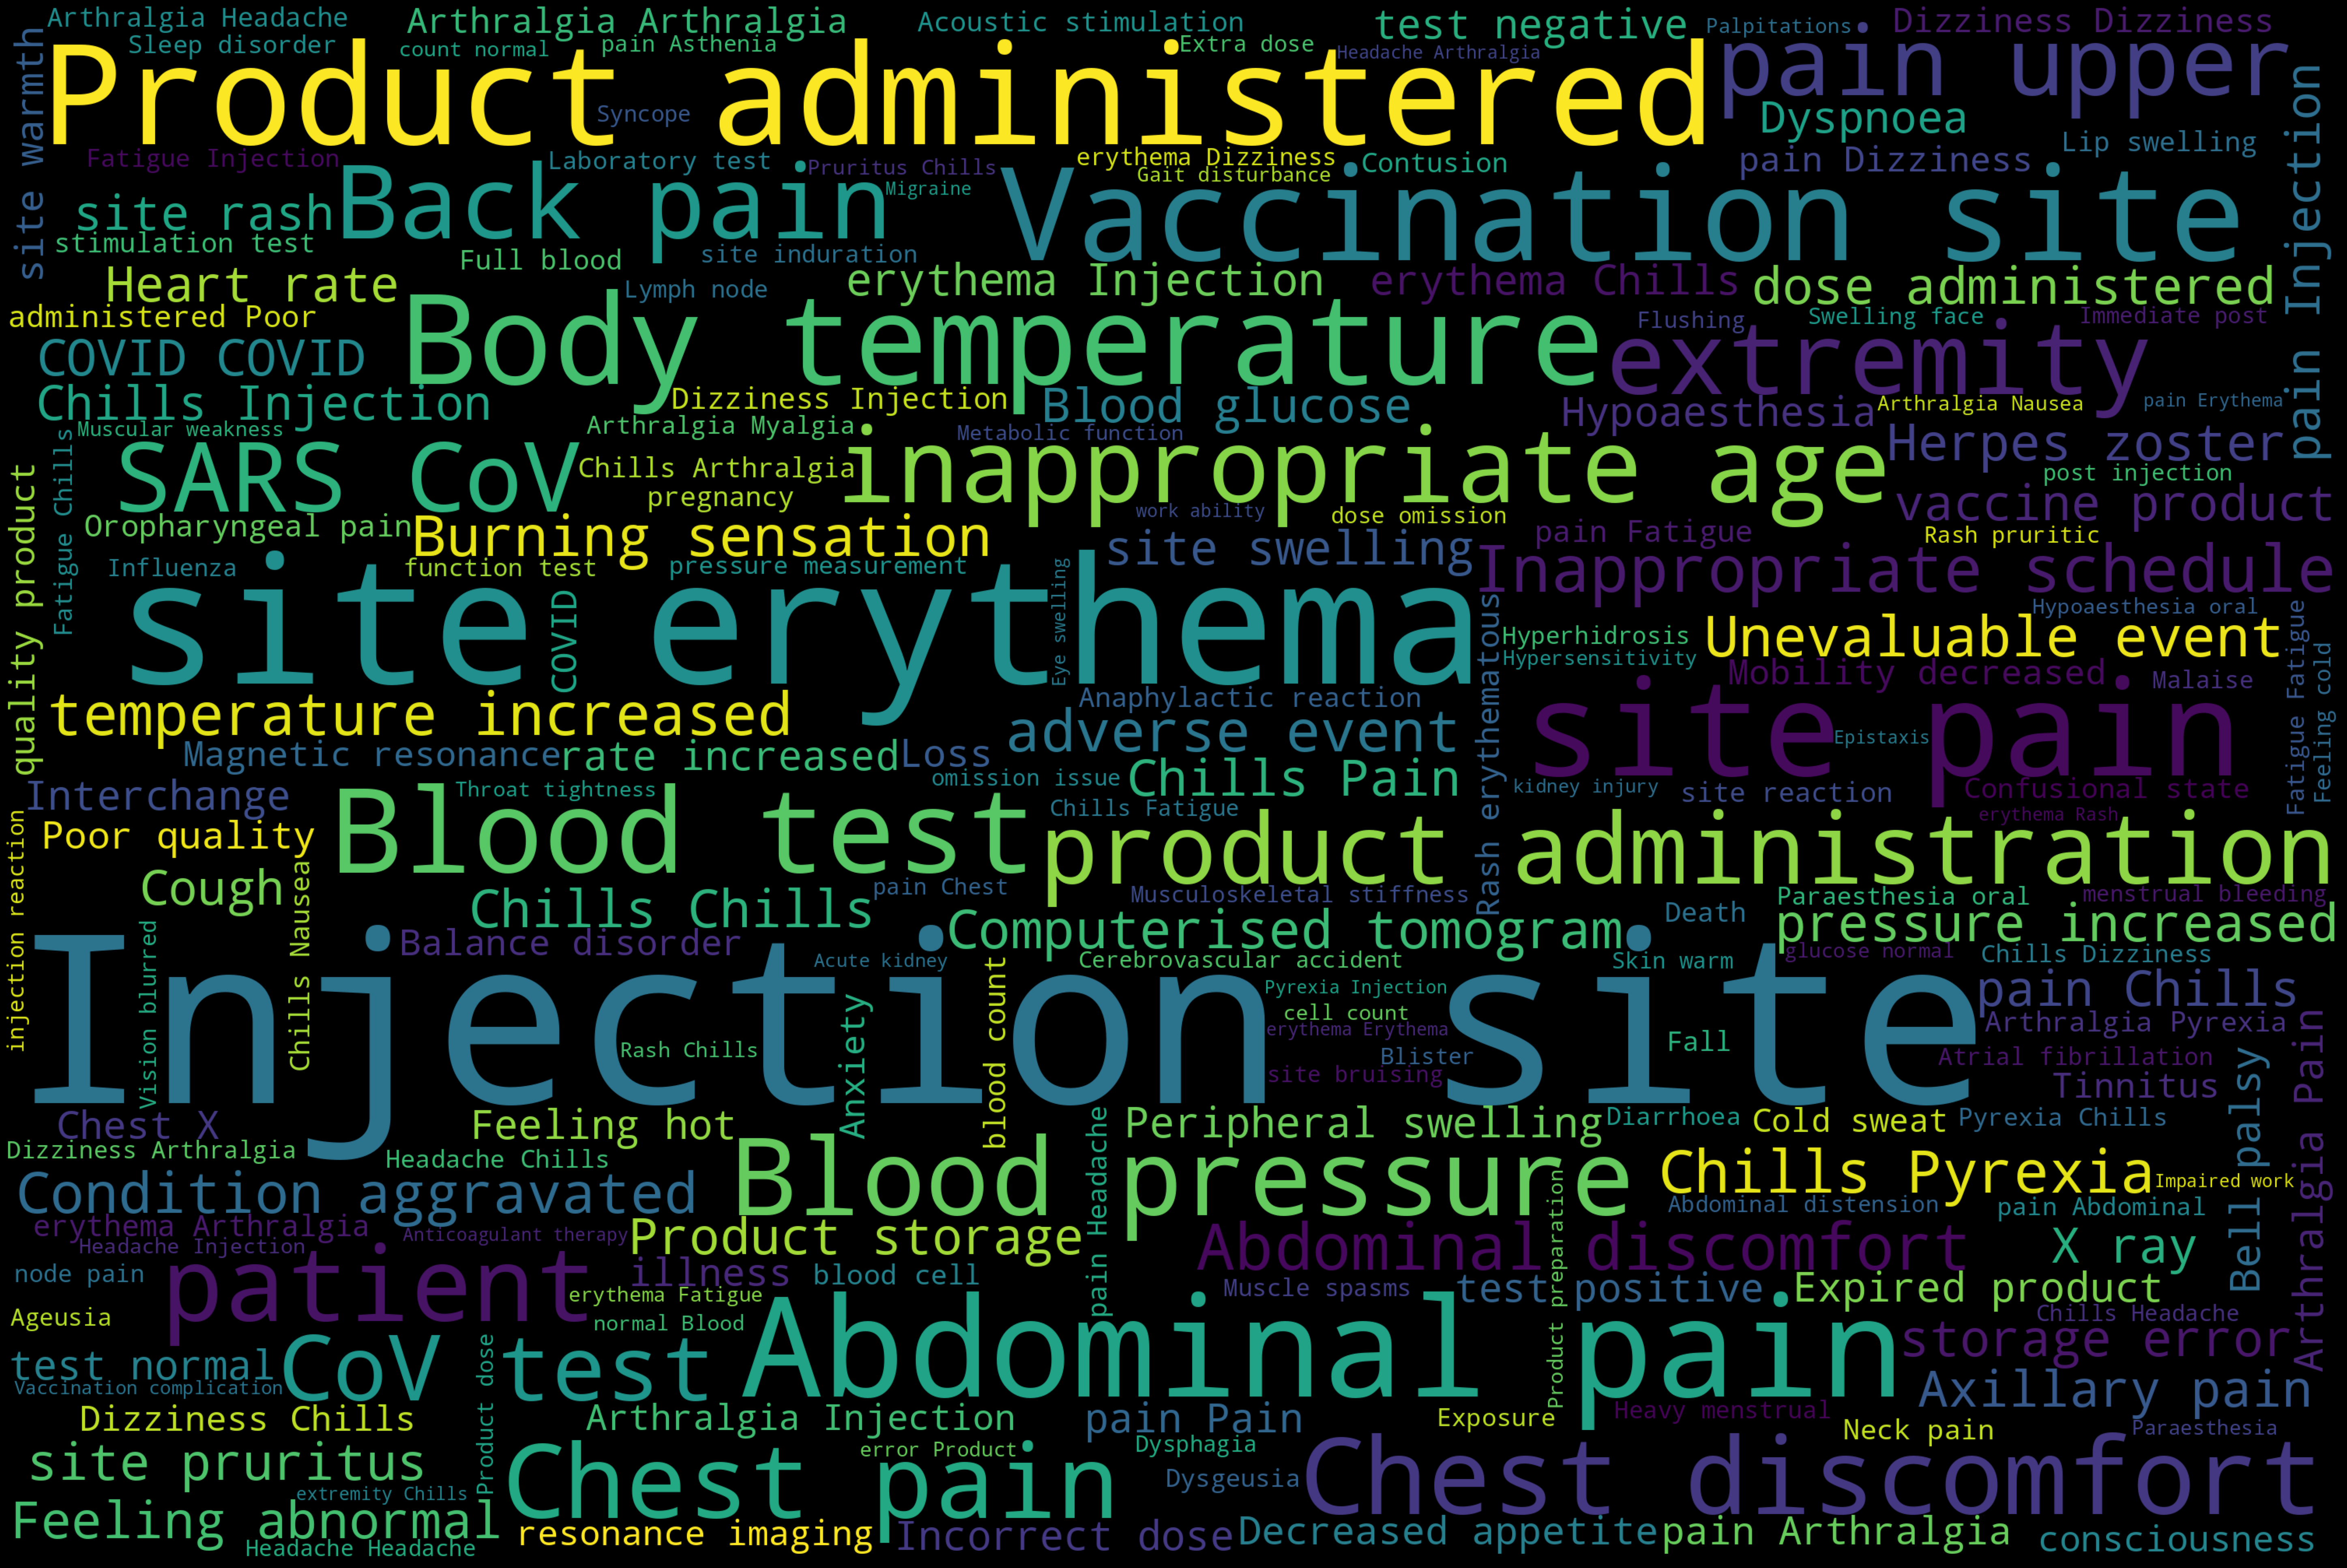

In [71]:
from wordcloud import WordCloud, STOPWORDS

def show_cloud(data,title=None):
    words_str=' '.join([str(elem) for elem in data])
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(words_str)
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
show_cloud(data.SYMPTOM1)